In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import seaborn as sns

In [2]:
#Import dataframe from JSON file
jsonStr = "parameters_df.json"
imported_df = pd.read_json(jsonStr, orient ='index')
print(imported_df.head)

<bound method NDFrame.head of                                                    red   green    blue  \
data/12910/0/12910_idx5_x3001_y701_class0.png   2.8792  2.7112  2.8076   
data/12910/0/12910_idx5_x1501_y401_class0.png   2.7392  2.7464  2.0908   
data/12910/0/12910_idx5_x2251_y1101_class0.png  1.1296  2.6620  2.2704   
data/12910/0/12910_idx5_x2551_y1151_class0.png  1.9812  2.8940  2.2452   
data/12910/0/12910_idx5_x2001_y101_class0.png   2.8660  3.0032  2.5404   
...                                                ...     ...     ...   
data/13666/1/13666_idx5_x901_y1101_class1.png   2.1980  2.3572  2.7020   
data/13666/1/13666_idx5_x1051_y1001_class1.png  2.6968  2.4552  2.5280   
data/13666/1/13666_idx5_x1051_y1151_class1.png  2.4272  2.8244  2.5152   
data/13666/1/13666_idx5_x1051_y1051_class1.png  2.5724  2.3860  2.5444   
data/13666/1/13666_idx5_x901_y1151_class1.png   2.7212  2.7648  3.0000   

                                                    gray  gray_var  edges  \
data

# Creating KNN classifier

In [53]:
#KNN algorithm


# Create feature and target arrays
X = imported_df[['red','blue','green','gray','edges','ridges']] #Getting the features of the pictures
y = imported_df['group'] #Getting the class of the pictures

############UNUSED STUFF###############################
#Easy plot method
#disp = ConfusionMatrixDisplay(conf_mat)
#disp.plot()
############UNUSED STUFF###################################

#Rescaling feaatures for better performance
#df_rescaled = imported_df.copy()
#scaler = RobustScaler() #Best accuracy
#scaler = StandardScaler() #2nd best
#scaler = MinMaxScaler() #Worst

'''
features = [['red','blue','green','gray','gray_var','edges','ridges']]
for feature in features:
    df_rescaled[feature] = scaler.fit_transform(df_rescaled[feature])

X = df_rescaled[['red','blue','green','gray','gray_var','edges','ridges']]
y = df_rescaled['group']
'''



# Split into training, test and validation set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False) #Train 80% Test 20%
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.125, shuffle=False) #Split train: 70% and 80%*0.125=10% validation


#scaler = RobustScaler()
#X_train = scaler.fit_transform(X_train)

#Defining empty arrays and parameters
step_size = 50
acc_for_ks = []
mse = []
conf_mat = []
conf_mat2 = []

#Knn classifier tuning
for i in range(1,400,step_size):
    #Scaling training data for better performance
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    
    
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='auto', leaf_size=30, metric='minkowski') #Tunable hyper parameters
    knn.fit(X_train, y_train) #train model
    
    X_val = scaler.transform(X_val) #MOVED THIS FROM UNDER SCALING X_train
    pred = knn.predict(X_val) #make prediction with validation set
    
    X_test = scaler.transform(X_test) #Scale test set after training to avoid data leakage
    pred2 = knn.predict(X_test) #make prediction with test set

    conf_mat.append(confusion_matrix(y_val, pred)) #Put true values and predictions with validation set in confusion matrix
    conf_mat2.append(confusion_matrix(y_test, pred2)) #Put true values and predictions with test setin confusion matrix

    match = 0
    UnMatch = 0
    
    #Counting correctly classified elements
    for i in range(len(pred)):
        if pred[i] == y_val[i]:
            match += 1
        else:
            UnMatch += 1

    accuracy = match/len(pred) #Calculating accuracy
    acc_for_ks.append(accuracy) #Putting ccuracies in array
    mse.append(mean_squared_error(y_val, pred)) #Putting mean square errors in array


#Print stats
print('Mean square error: ', min(mse))
print('Accuracy score: ', max(acc_for_ks)*100, '%')
print('Optimal K value is: ', np.argmax(acc_for_ks)*step_size+1)


Mean square error:  0.22757900046841784
Accuracy score:  77.24209995315822 %
Optimal K value is:  351


# Plot of performance for KNN classifier

Accuracy: 77.24209995315822 %
351


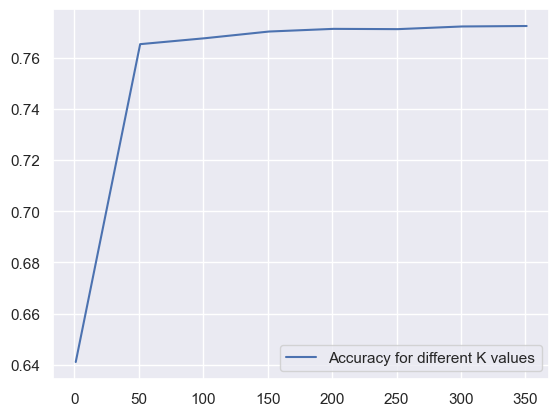

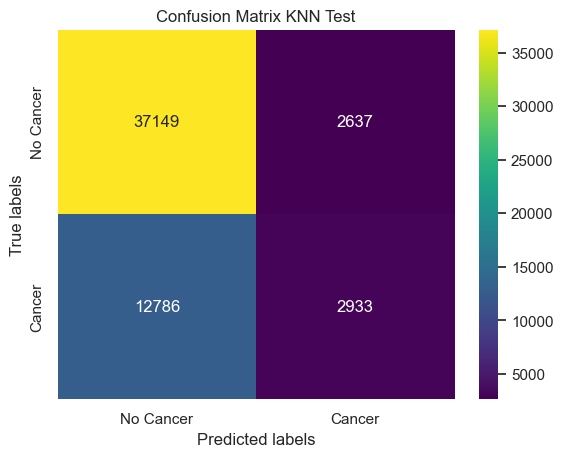

In [54]:
#Knn test
print('Accuracy:', max(acc_for_ks)*100,'%')
print(np.argmax(acc_for_ks)*step_size+1)

#Plot for tuning K 
plt.plot(range(1,400,step_size), acc_for_ks)
plt.legend(['Accuracy for different K values'], loc ="lower right")
plt.show()

#Plot confusion matrix
ax = plt.subplot()
sns.set(font_scale=1.0)
#sns.heatmap(conf_mat[np.argmax(acc_for_ks)], annot=True, ax=ax, cmap="crest", fmt="g");
sns.heatmap(conf_mat2[1], annot=True, ax=ax, cmap="viridis", fmt="g");
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix KNN Test');
ax.xaxis.set_ticklabels(['No Cancer', 'Cancer']);
ax.yaxis.set_ticklabels(['No Cancer', 'Cancer']);
plt.show()

